<head> 목적과 취지 </head>
<li> 한 싸이클을 구현하며 개선점 찾기</li>
<li> 앞으로의 코딩 방향성을 생각해 보기</li>
<li> 자료처리에서 문제가 생기는 부분을 바로 모듈에 반영하기</li>

# Module설치와 절대경로 설정 후 wrapper import

In [6]:
!pip install pykrx

  Using cached pykrx-1.0.12-py3-none-any.whl (79 kB)
  Using cached Deprecated-1.2.12-py2.py3-none-any.whl (9.5 kB)
  Using cached DateTime-4.3-py2.py3-none-any.whl (60 kB)


In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import matplotlib as pt
import pykrx
pt.use("Qt5Agg") ##플랏
sys.path.append(r'C:\Users\pc\Desktop\stock\P_R\wrapper')
from wrapper import data_pred
from wrapper import trading
from wrapper import visualization

# 다시 원래 주소로 working directory 변경

# 읽어올 파일과 주소 설정

In [54]:
os.chdir(r'C:\Users\pc\Desktop\stock\P_R')
cd ='KOSPI 200'
path = 'C:/Users/pc/Desktop/stock/P_R/data/'

## 이용할 인덱스 포트폴리오
portfolio = {
    'World indices' : ['Kospi 200', 'S&P 500', 'Nikkei 225', 'CSI 300']
}   ## 딕셔너리 형태
p_name = 'World indices'
p_cd = portfolio[p_name]

### 모듈을 이용하여 파일 읽어오기

## 스트링인 Date를 자동으로 Datetime형태로 바꿔서 index로 설정

In [55]:
ld = data_pred.LoadData()
df = ld.read_master_file(path, p_name)
print(df.head())
print(df.info())

            CSI 300  KOSPI 200  Kospi 200  Nikkei 225  S&P 500
Date                                                          
2017-01-02      nan     260.36     260.36         nan      nan
2017-01-03 3,342.23     262.97     262.97         nan 2,257.83
2017-01-04 3,368.31     263.12     263.12   19,594.16 2,270.75
2017-01-05 3,367.79     261.98     261.98   19,520.69 2,269.00
2017-01-06 3,347.67     263.20     263.20   19,454.33 2,276.98
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 635 entries, 2017-01-02 to 2019-06-07
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CSI 300     634 non-null    float64
 1   KOSPI 200   635 non-null    float64
 2   Kospi 200   635 non-null    float64
 3   Nikkei 225  633 non-null    float64
 4   S&P 500     634 non-null    float64
dtypes: float64(5)
memory usage: 29.8 KB
None


# Dataframe으로 자료처리

In [56]:
##단기, 중기 기준
short = 5
mid = 20

##ma 데이터프레임을 구축
ma = pd.DataFrame()
ma[cd] = df[cd]   ## 시세를 일단 넣어주고
ma['short'] = df[cd].rolling(short).mean()  ### rolling으로 단위를 계속 유지하면서 mean계산을 쌓아나감
ma['mid'] = df[cd].rolling(mid).mean()    ### 판다스 기능이니 유용하게 쓸 것
print(ma.head(20))

            KOSPI 200  short    mid
Date                               
2017-01-02     260.36    nan    nan
2017-01-03     262.97    nan    nan
2017-01-04     263.12    nan    nan
2017-01-05     261.98    nan    nan
2017-01-06     263.20 262.33    nan
2017-01-09     263.74 263.00    nan
2017-01-10     263.73 263.15    nan
2017-01-11     268.15 264.16    nan
2017-01-12     269.95 265.75    nan
2017-01-13     267.91 266.70    nan
2017-01-16     266.15 267.18    nan
2017-01-17     267.37 267.91    nan
2017-01-18     267.08 267.69    nan
2017-01-19     267.70 267.24    nan
2017-01-20     266.52 266.96    nan
2017-01-23     267.12 267.16    nan
2017-01-24     267.30 267.14    nan
2017-01-25     268.15 267.36    nan
2017-01-26     270.48 267.91    nan
2017-01-27     270.48 268.71 266.17


# 테스트 기준일자 설정와 지수 시각화

            KOSPI 200  short    mid
Date                               
2018-01-08     331.28 327.59 324.71
2018-01-09     330.25 328.44 324.97
2018-01-10     327.61 328.54 325.14
2018-01-11     325.67 328.76 325.12
2018-01-12     326.72 328.31 325.22
None


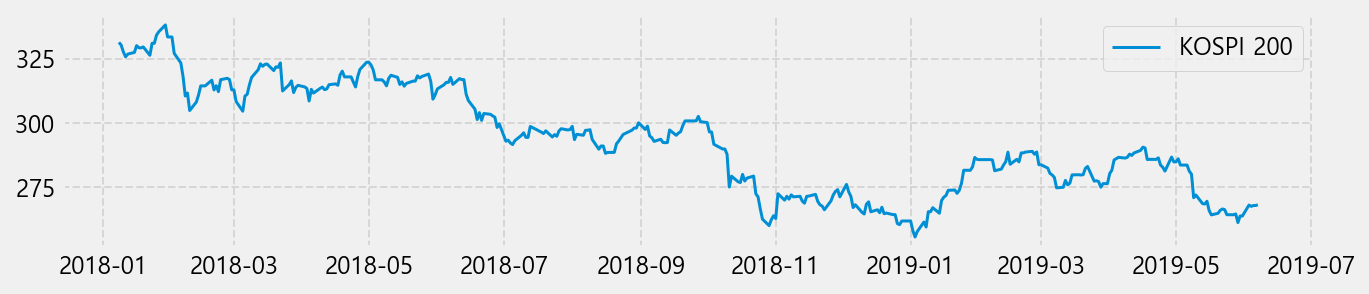

In [57]:
###기준일자 설정
base_date = '2018-01-08'
ma = ma[base_date:].copy()
print(ma.head())
v = visualization.Visualize()
print(v.price_view(ma, base_date, [cd], (10,2), make_file=False))

## 이동 평균과 비교 시각화

None


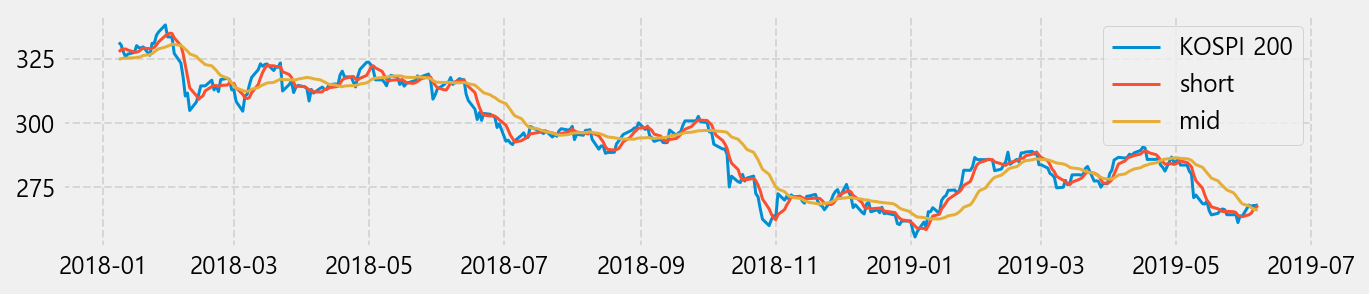

In [58]:
### 이평 비교 시각화
v = visualization.Visualize()
print(v.price_view(ma, base_date, [cd,'short' ,'mid'], (10,2), make_file=False))

In [59]:
### 골든크로스, 데드크로스 기본적 구현
ma['s-m'] = ma['short'] - ma['mid']
print(ma.head(50))

            KOSPI 200  short    mid    s-m
Date                                      
2018-01-08     331.28 327.59 324.71   2.88
2018-01-09     330.25 328.44 324.97   3.48
2018-01-10     327.61 328.54 325.14   3.39
2018-01-11     325.67 328.76 325.12   3.64
2018-01-12     326.72 328.31 325.22   3.09
2018-01-15     327.39 327.53 325.28   2.25
2018-01-16     330.02 327.48 325.45   2.04
2018-01-17     329.19 327.80 325.57   2.23
2018-01-18     329.13 328.49 325.73   2.76
2018-01-19     329.52 329.05 326.22   2.83
2018-01-22     326.27 328.83 326.48   2.35
2018-01-23     330.93 329.01 326.96   2.04
2018-01-24     330.91 329.35 327.56   1.79
2018-01-25     334.08 330.34 328.26   2.09
2018-01-26     335.38 331.51 328.79   2.73
2018-01-29     338.05 333.87 329.45   4.42
2018-01-30     333.40 334.36 329.82   4.54
2018-01-31     333.38 334.86 330.14   4.72
2018-02-01     333.36 334.71 330.58   4.14
2018-02-02     327.01 333.04 330.48   2.56
2018-02-05     323.29 330.09 330.08   0.01
2018-02-06 

# Trading book 생성

## module code는 wrapper에서 확인가능

In [60]:
trd = trading.Trade()
book = trd.create_trade_book(ma, [cd])
print(book.head()) 

            KOSPI 200 t KOSPI 200 p KOSPI 200
Date                                         
2018-01-08     331.28                        
2018-01-09     330.25                        
2018-01-10     327.61                        
2018-01-11     325.67                        
2018-01-12     326.72                        


# 짜놓은거 실행

In [61]:
def trend_trading(sample, book, cd, factor):
    for i in sample.index:
        if sample.loc[i, factor] >= 3:  ##상승추세면
            book.loc[i,'t '+cd] = 'buy' # 사
        elif sample.loc[i, factor] < -3:
            book.loc[i,'t '+cd] = 'sell'  ## 털어
        return (book)

In [62]:
book = trend_trading(ma, book, cd, 's-m')
print(trd.book.head())      

            KOSPI 200 t KOSPI 200 p KOSPI 200
Date                                         
2018-01-08     331.28                        
2018-01-09     330.25                        
2018-01-10     327.61                        
2018-01-11     325.67                        
2018-01-12     326.72                        


In [63]:
book = trd.position(book, [cd])
print(book.tail())

            KOSPI 200 t KOSPI 200 p KOSPI 200
Date                                         
2019-06-03     268.16                      zz
2019-06-04     267.66                      zz
2019-06-05     267.99                      zz
2019-06-06     267.99                      zz
2019-06-07     268.27                      zz


## 손익 테스팅

In [64]:
fund_rtn = trd.returns(book, [cd])

Accumulated return: 0.0 %  ( # of trade: 0 , # of win: 0 , fee: 0.00 %, period: 1.41 yr )
Avg return: 0.00 %, Prob. of win: 0.00 %, Kelly ratio: 0.00 %, MDD: 0.00 %


## 벤치마크 대비 수익률

In [65]:
bm_rtn = trd.benchmark_return(book, [cd])
print(bm_rtn)

BM return: -19.02 % {'KOSPI 200': 0.8098}
0.8098


## 벤치대비 초과수익률

In [66]:
exs_rtn = trd.excess_return(fund_rtn, bm_rtn)
print(exs_rtn)


Excess return: 19.02 %  ( 0.00 - -19.02 )
0.19020000000000004
